# Independent study - Sentiment Analysis 

Dawit Reda
ID#10189420
Independent Study: Sentiment Analysis - Progress 4
Submitted to Dr. Daniel Wu

# Introduction

According to the EMarketer’s research, Amazon covers almost 49.1% of an online sale in USA ecommerce market [1]. These days, buying a product online becomes convenient and easy with the product reviews and rates, the user also becomes highly interested to see the star and a review of a product before they decided to buy anything. People's online review opinion has a high impact in an online marketing. Since, Sentiment Analysis is extremely helpful to gain an overview of a public opinion behind the products and to understand what people are talking about the products online. Sentiment analysis is a natural language processing technique, which helps to identify and categorize opinions and to detect and extract subjective information in data and reviews [2]. In this project, I am going to analyze a customer review for Amazon Automotive product using Machine learning algorithms like Naive Bayes, Random forest classifier and Support Vector machines. 

## Purpose of the Project 

The purpose of this project is to investigate and analyze Amazon product review for a specific Automotive product using supervised learning algorithms and Natural language processing algorithms. This project determines a customer’s opinion about and determine the what the review expresses and classifies the review into negative, neutral and positive classes.

## Relevance of the Project 

Understanding what people think about a specific product is the most important information during decision making processes for a company, Since, NLP and Machine Learning algorithms techniques help us to solve questions like “What does the customer think about the product” in order to make better decision. This project explores how natural language processing and sentiment analysis works and how to implement a machine learning algorithm to classify and evaluate an opinion into different sentiments. 

## 1. Data Collection and Preprocessing

### 1.1 Import Libraries

In [83]:
#import important libraries  
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, GridSearchCV
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### 1.2 Load Data

In [3]:
#get data for amazon AWS product review for Automotive product 
def import_Automotive_review_data():
    #list of product reviews 
    list_of_amazon_reviews = r'https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt'
    #a url for automotive reviews
    amazon_link = r'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz'
    #read the data from the url
    df = pd.read_table(amazon_link, sep='\t',error_bad_lines=False,low_memory=False,warn_bad_lines=False)
      
    return df

#first five rows of the dataset
import_Automotive_review_data().head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,36075342,RAB23OVFNCXZQ,B00LPRXQ4Y,339193102,"17"" 2003-2006 Ford EXPEDITION Ford F150 2004-2...",Automotive,1,0.0,0.0,N,Y,"As it was used,","As it was used, the method that Ford used to a...",2015-08-31
1,US,42462164,R3NORADVJO6IE6,B000C7S0TO,907684644,Spectra Premium CU1909 Complete Radiator for T...,Automotive,5,0.0,0.0,N,Y,Five Stars,"Put it in fine, no problems. Shipping was dece...",2015-08-31
2,US,21241933,R299F4SO98S5OO,B000CO9WE4,752246352,K&N E-4665 High Performance Replacement Indust...,Automotive,5,1.0,1.0,N,Y,Great fit and performance on the surface drive...,Fit wonderfully on my 36HP Pro-Drive motor.,2015-08-31
3,US,52570308,R2DA9DOT03UW6I,B000GKD5NI,105401756,Suncutters Rear Window Shade,Automotive,5,2.0,3.0,N,Y,Good for the price. Fits fairly good on 2010 T...,Good for the price! So far I have put it up i...,2015-08-31
4,US,38200102,R2OGCH681EQHU6,B009SDA7TE,728471129,Lug Nuts Landcruiser Tundra OEM Mag 14x1.5 Thr...,Automotive,5,0.0,0.0,N,Y,Five Stars,Fit perfectly on my 2012 Tundra with stock alu...,2015-08-31


In [85]:
 # gives number of row count
data_len = len(import_Automotive_review_data())
count_row = df.shape[0] 

In [86]:
ddata_len


3510895

### 1.3 Remove unnecessary columns

In [4]:
#remove unnecessary columns from the data and select the stars, review headlines and review body columns
def select_important_columns():
    df = import_Automotive_review_data()
    df = df[['product_title','star_rating','review_headline','review_body']]
    return df
select_important_columns().head()

,product_title,star_rating,review_headline,review_body
0,"17"" 2003-2006 Ford EXPEDITION Ford F150 2004-2...",1,"As it was used,","As it was used, the method that Ford used to a..."
1,Spectra Premium CU1909 Complete Radiator for T...,5,Five Stars,"Put it in fine, no problems. Shipping was dece..."
2,K&N E-4665 High Performance Replacement Indust...,5,Great fit and performance on the surface drive...,Fit wonderfully on my 36HP Pro-Drive motor.
3,Suncutters Rear Window Shade,5,Good for the price. Fits fairly good on 2010 T...,Good for the price! So far I have put it up i...
4,Lug Nuts Landcruiser Tundra OEM Mag 14x1.5 Thr...,5,Five Stars,Fit perfectly on my 2012 Tundra with stock alu...


### 1.4 Top 5 reviewed Automotive Products in Amazon

In [5]:
#find the top 5 reviewed automotive products which has a max review
def top_5_reviewed_Automotive_product():
    df =select_important_columns() 
    # value_counts()  will return a count in  descending order 
    return df['product_title'].value_counts()
top_5_reviewed_Automotive_product().head()

BAFX Products 34t5 Bluetooth OBDII Scan Tool for Android Devices                                             4888
Battery Tender Jr. Battery Charger                                                                           4415
Autel MaxiScan MS300 CAN Diagnostic Scan Tool for OBDII Vehicles                                             3703
FINIGO 3-Way Multi Socket Auto Car Cigarette Lighter Splitter with USB Port+ dual USB Car Charger Adapter    3594
Jump-N-Carry                                                                                                 3134
Name: product_title, dtype: int64

#### 1.4.1 Get the most reviewed Automotive product in Amazon

In [6]:
#get the highest automotive review product
def highest_review_product():
    df =select_important_columns() 
    get_the_highest_row_count = df.groupby(['product_title'])['product_title'].value_counts().nlargest(1)
    return get_the_highest_row_count
highest_review_product()

product_title                                                     product_title                                                   
BAFX Products 34t5 Bluetooth OBDII Scan Tool for Android Devices  BAFX Products 34t5 Bluetooth OBDII Scan Tool for Android Devices    4888
Name: product_title, dtype: int64

### 1.5 Get all the reviews for the highest reviewed product

In [7]:
#get the highest reviewed BAFX Products only from the amazon automotive review data
def get_highest_reviewed_Products():
    df =select_important_columns() 
    df_clean = df[df['product_title'] =='BAFX Products 34t5 Bluetooth OBDII Scan Tool for Android Devices']
    return df_clean

get_highest_reviewed_Products().head()

,product_title,star_rating,review_headline,review_body
874,BAFX Products 34t5 Bluetooth OBDII Scan Tool f...,5,Works every time using apps on my Windows Lumi...,Works every time using apps on my Windows Lumi...
901,BAFX Products 34t5 Bluetooth OBDII Scan Tool f...,5,Five Stars,Very cool and helpful.
1128,BAFX Products 34t5 Bluetooth OBDII Scan Tool f...,4,Four Stars,Bluetooth connection can lag at times but over...
1330,BAFX Products 34t5 Bluetooth OBDII Scan Tool f...,4,I like it. The only thing is it's a bit ...,Works very well. I like it. The only thing i...
1400,BAFX Products 34t5 Bluetooth OBDII Scan Tool f...,4,Four Stars,It works!


### 1.6 Length of the reviews

In [8]:
#count the length of the data for BAFX Products 
def len_of_data():
    df =get_highest_reviewed_Products() 
    length_of_data =sum(len(text) for text in df['product_title'])     
    
    return length_of_data
#total len of the data is 312832
len_of_data()

312832

### 1.7 Concatenate the review headline and the review body 

In [9]:
#concatenate the review headline and the review of the product 
def Review_data():
    df = get_highest_reviewed_Products()
    #remove SettingwithCopyWarning warning
    pd.options.mode.chained_assignment = None
    df['Review'] = df['review_headline'].str.cat(df['review_body'],sep=" ")
    df_new = df[['star_rating','Review']]
    return df_new
Review_data().head()

,star_rating,Review
874,5,Works every time using apps on my Windows Lumi...
901,5,Five Stars Very cool and helpful.
1128,4,Four Stars Bluetooth connection can lag at tim...
1330,4,I like it. The only thing is it's a bit ... Wo...
1400,4,Four Stars It works!


In [88]:
#count the length of the merged data for BAFX Products 
def len_of_merged_data():
    df =Review_data() 
    length_of_data =sum(len(text) for text in df['Review'])     
    
    return length_of_data
#total len of the data is 312832
len_of_merged_data()

1520241

### 1.8 Removing Special Characters

In [11]:
#remove all special characters and Uniform Spelling of Words to lowercase 
def Data_PreProcessing():
    df = Review_data()
    
    #uniform the automotive data into lowercase 
    df['Review'] = [x.lower() for x in df['Review']]
    
    #Removing Special Characters from the review
    df['Review'] = [re.sub(r"[^a-zA-Z0-9]+", ' ', x) for x in df['Review']]
    
    # remove URLs with www and https from the review
    df['Review'] =[re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', x) for x in df['Review']]
    
    # remove the # from each review
    df['Review'] = [re.sub(r'#([^\s]+)', '', x) for x in df['Review']]
    
    return df
#display processed data    
Data_PreProcessing().head()

,star_rating,Review
874,5,works every time using apps on my windows lumi...
901,5,five stars very cool and helpful
1128,4,four stars bluetooth connection can lag at tim...
1330,4,i like it the only thing is it s a bit works v...
1400,4,four stars it works


In [13]:
#get some info and describe of the data
def describe_data():
    cleaned_data =Data_PreProcessing()
    info = cleaned_data.info()
    #describe of the file
    describe = cleaned_data.describe()
    
    return info, describe

describe_data()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 874 to 3341399
Data columns (total 2 columns):
star_rating    4888 non-null object
Review         4888 non-null object
dtypes: object(2)
memory usage: 114.6+ KB


(None,        star_rating                  Review
 count         4888                    4888
 unique           5                    4804
 top              5  five stars works great
 freq          3628                      18)

# 2. Text Classification, Feature Extraction and Sentiment Visualization 

### 2.1 Count words in each review

In [14]:
#count words in each review and add a column called Word_Count
def count_words():
    cleaned_data =Data_PreProcessing()
    cleaned_data["Word_Count"] = cleaned_data['Review'].str.lower().str.split().apply(len)
    
    return cleaned_data
count_words().head()

,star_rating,Review,Word_Count
874,5,works every time using apps on my windows lumi...,38
901,5,five stars very cool and helpful,6
1128,4,four stars bluetooth connection can lag at tim...,12
1330,4,i like it the only thing is it s a bit works v...,27
1400,4,four stars it works,4


### 2.2 Creating a Labels of the Review

In [87]:
#let's create a new column
def labels_of_the_review():
    df =count_words()
    #refactoring the code -- create a dict to store the star rating and map it to three classes 
    lable_maping = {'1': 'Negative',
                    '2':'Negative',
                    '3':'Neutral',
                    '4':'Positive',
                    '5':'Positive'}
    df['Labels']=df['star_rating'].map(lable_maping)
    
    return df
        
labels_of_the_review().head()     

,star_rating,Review,Word_Count,Labels
874,5,works every time using apps on my windows lumi...,38,Positive
901,5,five stars very cool and helpful,6,Positive
1128,4,four stars bluetooth connection can lag at tim...,12,Positive
1330,4,i like it the only thing is it s a bit works v...,27,Positive
1400,4,four stars it works,4,Positive


## 2.3  Sentiment Visualization

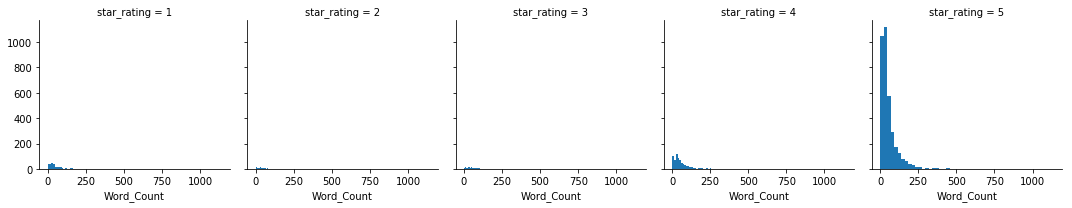

In [16]:
#let's see Seaborn’s FacetGrid which will allows us to create a grid of histograms placed side by side as below for the star rating
def FacetGrid_hist():
    df = labels_of_the_review()
    g = sns.FacetGrid(data=df, col='star_rating')
    g.map(plt.hist, 'Word_Count', bins=50)
    
FacetGrid_hist()

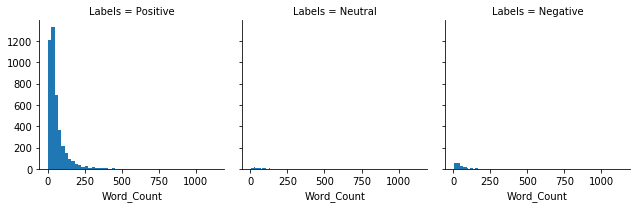

In [17]:
#let's see the Seaborn’s FacetGrid for the labels too
def FacetGrid_hist_Labels():
    df = labels_of_the_review()
    g = sns.FacetGrid(data=df, col='Labels')
    g.map(plt.hist, 'Word_Count', bins=50)
    
FacetGrid_hist_Labels()

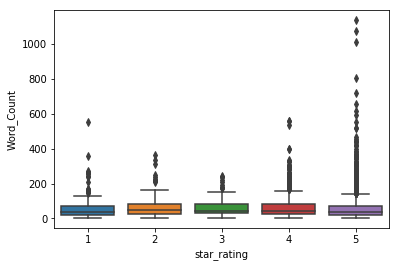

In [18]:
#let’s create a box plot of the review text length for each star rating
def boxplot_star_rating():
    df = labels_of_the_review()
    sns.boxplot(x='star_rating', y='Word_Count', data=df)
boxplot_star_rating()

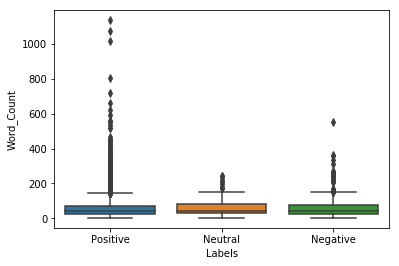

In [19]:
#let’s create a box plot of the review text length for each Lables
def boxplot_Lables():
    df = labels_of_the_review()
    sns.boxplot(x='Labels', y='Word_Count', data=df)
boxplot_Lables()

In [20]:
df = labels_of_the_review()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 874 to 3341399
Data columns (total 4 columns):
star_rating    4888 non-null object
Review         4888 non-null object
Word_Count     4888 non-null int64
Labels         4888 non-null object
dtypes: int64(1), object(3)
memory usage: 190.9+ KB


In [21]:
# show star_rating distribution
df["star_rating"].value_counts(normalize = True)

5    0.742226
4    0.142390
1    0.053191
3    0.039484
2    0.022709
Name: star_rating, dtype: float64

In [22]:
#Let’s group the data by the star rating, and see if we can find a correlation between features 
def star_rating_correlation():
    df = labels_of_the_review()
    stars = df.groupby('Labels').mean()
    return stars.corr()
star_rating_correlation()    

,Word_Count
Word_Count,1.0


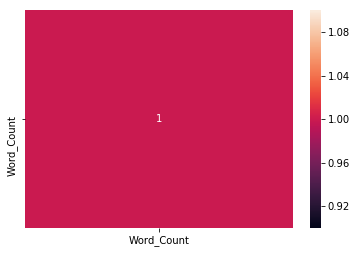

In [23]:
def visualize_correlation():
    df = labels_of_the_review()
    stars = df.groupby('Labels').mean()
    sns.heatmap(data=stars.corr(), annot=True)
visualize_correlation()

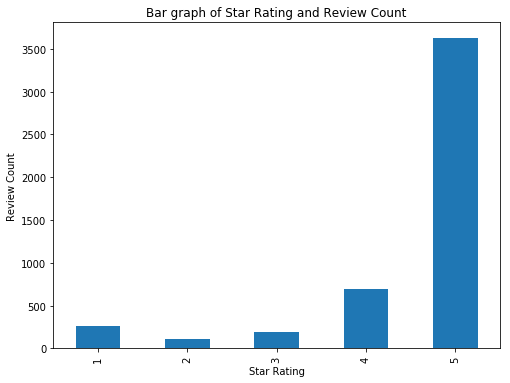

In [90]:
def plot_bar_graph_star():
    df = labels_of_the_review()
    fig = plt.figure(figsize=(8,6))
    df.groupby('star_rating').Review.count().plot.bar(ylim=0)
    plt.title("Bar graph of Star Rating and Review Count")
    plt.xlabel("Star Rating")
    plt.ylabel("Review Count")
    plt.show()
plot_bar_graph_star()

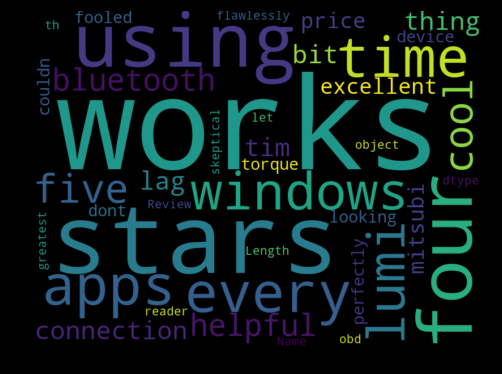

334.90154242515564


In [93]:
#Understanding the common words used in the Review
#Let’s visualize all the words together for the cleaned data using the wordcloud plot.
def word_cloud_all_words():
    review = labels_of_the_review()['Review']
      
    wordcloud = WordCloud(
        width = 800,
        height = 600,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(review))
    fig = plt.figure(
        figsize = (8, 5),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

    
#measuring elapsed time
start_time = time.time()
word_cloud_all_words()
elapsed_time = time.time() - start_time
print(elapsed_time)

# 3. Machine Learning Technique: Tokenization and Balancing oversampling

## 3.1 Balancing oversampling

As we can see below, we have {'Positive': 4324, 'Negative': 371, 'Neutral': 193} which is not balanced, we need to take the least common labels to balance the oversampling

In [26]:
data = labels_of_the_review()

labels_class=[]
for labels in data['Labels']:
    labels_class.append(labels)
print(len(labels_class)) 

#number of positive, negative and nuetral occurrences in the data are:
print(Counter(labels_class))

4888
Counter({'Positive': 4324, 'Negative': 371, 'Neutral': 193})


In [27]:
# Let's create a function which will balance the labels and the review of the data using Counter() function
def balancing_labels(X, Y):       
    frequency = Counter(Y)     
    #the most_common function will return a list of the n most common elements and their counts from 
    #the most common to the least.
    max_allowable = frequency.most_common()[-1][1]
    num_added = {labels: 0 for labels in frequency.keys()}
    new_y = []
    new_x = []
    for a, y in enumerate(Y):
        if num_added[y] < max_allowable:
            new_y.append(y)
            new_x.append(X[a])
            num_added[y] += 1
    return new_x, new_y


In [28]:
def balancing_label_review():
    df_data =labels_of_the_review()
    Labels = []
    Review=[]
    for a in df_data['Review']:
        Review.append(a)
    for b in df_data['Labels']:
        Labels.append(b)
    return Review,Labels
   

In [29]:
#now let's balance the review data and the labels using the function
def balanced_input_data():
    review,labels=balancing_label_review()
    x_review, y_labels=balancing_labels(review,labels)
    return x_review, y_labels

x_review, y_labels = balanced_input_data()

In [30]:
#total of Positive, Neutral, Negative = 193*3 = 579
len(x_review)

579

In [31]:
Counter(y_labels)

Counter({'Positive': 193, 'Neutral': 193, 'Negative': 193})

As we can see above, the data has been balanced into 193 from all the inputs - Counter({'Positive': 193, 'Neutral': 193, 'Negative': 193}), now we can build a model based on the balanced data

### 3.2 Tokenization,Removing Short Words and Stemming  Using NLTK 

In [91]:
#tokenize, Lemmatization and remove if the length of the words is less than 3 for all the reviews
def tokenize_review():
    x_review, y_labels = balanced_input_data()
    list_of_words =[]
    for text in x_review:
        #split the string into word
        tokens = nltk.tokenize.word_tokenize(text)
        #remove short words if their length is less than three
        tokens = [a for a in tokens if len(a)>3]       
        #let's converting a word to its base form using WordNet lemmatizer        
        tokens =[nltk.stem.WordNetLemmatizer().lemmatize(a) for a in tokens]
        #append the words into list of words 
        list_of_words.append(tokens)
    return list_of_words,y_labels
#display some of the tokenize data
tokenize_review()[0:2]

### 3.3 Stopwords Removal

In [92]:
# filter out or remove the stopwords
def stop_word_removal():
    #Stopwords removal
    x_review, y_labels=tokenize_review()
    cleaned_data = []
    for words in x_review:
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
        cleaned_data.append(words)
    return cleaned_data,y_labels
#display some sample outputs

stop_word_removal()[:2]

### 3.4 Word Embeddings

#### 3.4.1 Frequency distribution

In [34]:
# FreqDist class is used to encode “frequency distributions”, 
#which count the number of times that each outcome of an experiment occurs.
def word_length_distr():
    x_review, y_labels =stop_word_removal()  
    #let's get the frequency of each word type in a document
    fdist = nltk.FreqDist(len(w) for w in x_review)       
    return fdist

word_length_distr()    

FreqDist({4: 34, 6: 29, 5: 25, 13: 25, 7: 23, 16: 23, 8: 22, 9: 22, 18: 19, 3: 18, ...})

#### 3.4.2 CountVectorizer by sklearn 

In [35]:
#let's create CountVectorizer() method to create these word embeddings using sklearn
def Count_Vectorizer():
    x_review, y_labels = stop_word_removal()
    #combine all the words into one set
    texts = list(itertools.chain.from_iterable(x_review))

    #Convert a collection of text documents to a matrix of token counts
    vectorizer = CountVectorizer()
    transformed_doc = vectorizer.fit_transform(texts)
    
    return transformed_doc
Count_Vectorizer()

<13128x2276 sparse matrix of type '<class 'numpy.int64'>'
	with 13128 stored elements in Compressed Sparse Row format>

#### 3.4.3  Word Frequencies with TF-IDF using the Scikit-Learn Library

In [36]:
#term Frequency-Inverse Document Frequency (TF-IDF)
#sklearn provides the method TfidfVectorizer to calculate the TF-IDF values
def vectorize_text_feature():
    docs = Count_Vectorizer()
    #combine all the words into one set
    texts = list(itertools.chain.from_iterable(docs))  
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    processed_features =tfidf_transformer.fit(docs)
    return processed_features

vectorize_text_feature()

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

## 4  Making Predictions and Evaluating the Model

### 4.1 Build the pipeline

In [37]:
#Pipeline of transforms with a final estimator
def Pipeline_transform():
    #let's create CountVectorizer() method to create these word embeddings using sklearn
    #TfidfVectorizer to calculate the TF-IDF values
    #MultinomialNB implements the naive Bayes algorithm for multinomially distributed data
    text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
    # Set the parameters by cross-validatio
    tuned_parameters = {'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
                        'tfidf__use_idf': (True, False),
                        'tfidf__norm': ('l1', 'l2'),
                        'clf__alpha': [1, 1e-1, 1e-2]
                        }
    return text_clf,tuned_parameters  

### 4.2 Split the data into Train and Test

In [38]:
def train_test_split_from_balanced_data():
    #get the balanced data
    x_review, y_labels = balanced_input_data()
    
    #let's use the train_test_split function in order to make the split with 20% test size  
    x_train, x_test, y_train, y_test = train_test_split(x_review,
                                                        y_labels, 
                                                        test_size=0.2, 
                                                        random_state=42)
    
    #the function will return train and test data for both the review and the labels 
    return x_train, x_test, y_train, y_test     
    

### 4.3 Multinomial Naive Bayes 

In [39]:
def MultinomialNB_classification():
    #get the pipeline of the classifiers and the tuned parameters
    text_clf,tuned_parameters = Pipeline_transform()
    
    #let's split the balanced data into training and test set
    x_train, x_test, y_train, y_test = train_test_split_from_balanced_data()
    

    
    """
    According to the sklearn.model_selection.GridSearchCV documentation:
    GridSearchCV implements a “fit” and a “score” method. It also implements “predict”,
    “predict_proba”, “decision_function”, “transform” 
    and “inverse_transform”
    """
    #let's train our data using MultinomialNB
    clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
    clf.fit(x_train, y_train)
    
    #let's make a predictions on the model
    y_pred = clf.predict(x_test)
    
    # Model Accuracy
    print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)
    print()
    
    #let's Build a text report showing the main classification metrics
    print("The main classification metrics: precision,recall, f1-score and   support are: \n")
    print(classification_report(y_test, clf.predict(x_test)))  
    
MultinomialNB_classification()                     

Accuracy: 73.27586206896551

The main classification metrics: precision,recall, f1-score and   support are: 

              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76        39
     Neutral       0.56      0.67      0.61        33
    Positive       0.85      0.77      0.81        44

    accuracy                           0.73       116
   macro avg       0.73      0.73      0.73       116
weighted avg       0.75      0.73      0.74       116



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 4.4  Random Forest Classifier

In [41]:
def Random_Forest_Classifier():
    
    #let's balance the review data
    docs, labels  = balanced_input_data()
    
    #let's convert text features into TF-IDF feature vectors
    vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
    review = vectorizer.fit_transform(docs).toarray()
    
    #let's split the balanced data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(review, labels, test_size=0.2, random_state=0)
    
    #let's train our data using RandomForestClassifier
    text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
    text_classifier.fit(X_train, y_train)
    
    #let's make a predictions on the model
    predictions = text_classifier.predict(X_test)
    
    
    """let's evaluate the performance of the machine learning models,
    let's use classification metrics such as a confusion metrix, F1 measure, accuracy"""
    
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    print('\n')
    print('Classification Report of Random Forest Classifier')
    print(classification_report(y_test,predictions))
    print('\n')
    #percentage of accuracy score
    print("Percentage of accuracy score: ")
    print((accuracy_score(y_test, predictions))*100)
    print('\n')
    
 
Random_Forest_Classifier()

Confusion Matrix
[[33  3  2]
 [12 22  9]
 [ 5  7 23]]


Classification Report
              precision    recall  f1-score   support

    Negative       0.66      0.87      0.75        38
     Neutral       0.69      0.51      0.59        43
    Positive       0.68      0.66      0.67        35

    accuracy                           0.67       116
   macro avg       0.67      0.68      0.67       116
weighted avg       0.68      0.67      0.66       116



Percentage of accuracy score: 
67.24137931034483




From the Random Forest Classifier output, we can see that our algorithm achieved an accuracy of 67.24.

## 4.5 Support Vector Machine

In [43]:

clf_svm = svm.SVC(gamma='scale')

In [44]:
docs, labels  = balanced_input_data()
    
    #let's convert text features into TF-IDF feature vectors
vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
review = vectorizer.fit_transform(docs).toarray()
   
    #let's split the balanced data into training and test set
X_train, X_test, y_train, y_test = train_test_split(review, labels, test_size=0.2, random_state=0)
    

In [45]:
clf_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
prediction_linear = clf_svm.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction_linear, output_dict=True)

In [84]:
report

{'Negative': {'precision': 0.7441860465116279,
  'recall': 0.8421052631578947,
  'f1-score': 0.7901234567901234,
  'support': 38},
 'Neutral': {'precision': 0.6595744680851063,
  'recall': 0.7209302325581395,
  'f1-score': 0.6888888888888888,
  'support': 43},
 'Positive': {'precision': 0.7692307692307693,
  'recall': 0.5714285714285714,
  'f1-score': 0.6557377049180327,
  'support': 35},
 'accuracy': 0.7155172413793104,
 'macro avg': {'precision': 0.7243304279425011,
  'recall': 0.7114880223815353,
  'f1-score': 0.7115833501990149,
  'support': 116},
 'weighted avg': {'precision': 0.7203780070532617,
  'recall': 0.7155172413793104,
  'f1-score': 0.712049424589466,
  'support': 116}}

In [81]:
#let's print out the accuracy of the SVM algorithm
print('Accuracy using SVM is: ',report['accuracy']*100)

Accuracy using SVM is:  71.55172413793103


In [82]:
#let't print out the report for the pos,neg and Nutral of the precision,recall and f1 values 
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Positive: ', report['Positive'])
print('Neutral: ', report['Neutral'])
print('Negative: ', report['Negative'])

Positive:  {'precision': 0.7692307692307693, 'recall': 0.5714285714285714, 'f1-score': 0.6557377049180327, 'support': 35}
Neutral:  {'precision': 0.6595744680851063, 'recall': 0.7209302325581395, 'f1-score': 0.6888888888888888, 'support': 43}
Negative:  {'precision': 0.7441860465116279, 'recall': 0.8421052631578947, 'f1-score': 0.7901234567901234, 'support': 38}


As we can see the results above, the accuracy of the SVM is 71.55. Better than of the random forest but still, the Naive bayes algorithm performs better.

# Results and Discussion

The main objective of this project is to investigate experimentally customer’s opinion for a specific Amazon product using machine learning algorithms such as Naïve Bayes, Random Forest and support vector machines.
In order to evaluate the performance of the models, I have used three standard measures of performance: precision recall f1-score, in addition to the accuracy values. The accuracy value of the models represents the percentage of the test review labels which was classifies correctly based on the trained data. Based on the results of the analysis, the Naïve Bayes model has been achieved 73% of the accuracy. As we can see in table 1, the Naïve Bayes model has best performance when we compare with other classifiers.

Multinomial Naive Bayes
Class	Precision	  Recall  	f1-score
Negative	0.78	0.74	0.76
     Neutral     	0.56	0.67	0.61
    Positive      	0.85	0.77	0.81
 	 	 	 
Random Forest Classifier
Class	Precision	  Recall  	f1-score
Negative	0.66	0.87	0.75
     Neutral     	0.69	0.51	0.59
    Positive      	0.68	0.66	0.67
 	 	 	 
Support Vector Machine
Class	Precision	  Recall  	f1-score
Negative	0.744	0.84	0.79
     Neutral     	0.659	0.72	0.688
    Positive      	0.769	0.57	0.655


# Future work

In this project, I have analysis the sentiment analysis for a specific Amazon product of review, but similar analysis for other Automotive products should be done for the future
In addition, more review data should be used to train and test the models in order to improve the accuracy of the algorithms. 


# Reference

1.	eMarketer Editors, Jul 16, 2018, Amazon Now Has Nearly 50% of US Ecommerce Market” Retrieved from https://www.emarketer.com/content/amazon-now-has-nearly-50-of-us-ecommerce-market 
2.	ChandraKala S and Sindhu C 2012 Opinion mining and sentiment classification: a survey
3.	Amazon Reviews Dataset - Amazon S3: https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt
4.	Jin, Hua et al. “Sentiment Visualization on Tweet Stream.” JSW 9 (2014): 2348-2352.
5.	S. Shayaa et al., "Sentiment analysis of big data: Methods applications and open challenges", IEEE Access, vol. 6, pp. 37807-37827, 2018. 
6.	 Opitz, D.; Maclin, R. (1999). "Popular ensemble methods: An empirical study". Journal of Artificial Intelligence Research. 
7.	Jonathan J. Webster & Chunyu Kit City Polytechnic of Hong Kong, “TOKENIZATION AS THE INITIAL PHASE IN NLP’
8.	Rajaraman, A.; Ullman, J. D. (2011). "Data Mining" (PDF). Mining of Massive Datasets. pp. 1–17.
9.	 Bo Pang and Lillian Lee 2008 Opinion mining and sentiment analysis
10.	M. Bouazizi, T. Ohtsuki, "A pattern-based approach for multi-class sentiment analysis in Twitter", IEEE Access, vol. 5, pp. 20617-20639, 2017.
11.	A. Zaslavsky, C. Perera, and D. Georgakopoulos, “Sensing as a Service and Big Data,” 2015.

